<a href="https://colab.research.google.com/github/Abdallah4Z/Multi-Class-Prediction-of-Obesity-Risk/blob/belal_model/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
print(train_data.shape[0], test_data.shape[1])
print(test_data.shape[0], test_data.shape[1])
print("Train")
train_data.head()
print("Test")
test_data.head()

20758 17
13840 17
Train
Test


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [3]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [4]:
train_data.isna().sum()
test_data.isna().sum()

,0
id,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0


In [5]:
train_data

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [6]:
test_data

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


In [7]:
num_cols = train_data.select_dtypes(include=['number']).columns
cat_cols = train_data.select_dtypes(include='object').columns

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>,
        <Axes: title={'center': 'CH2O'}>],
       [<Axes: title={'center': 'FAF'}>, <Axes: title={'center': 'TUE'}>,
        <Axes: >]], dtype=object)

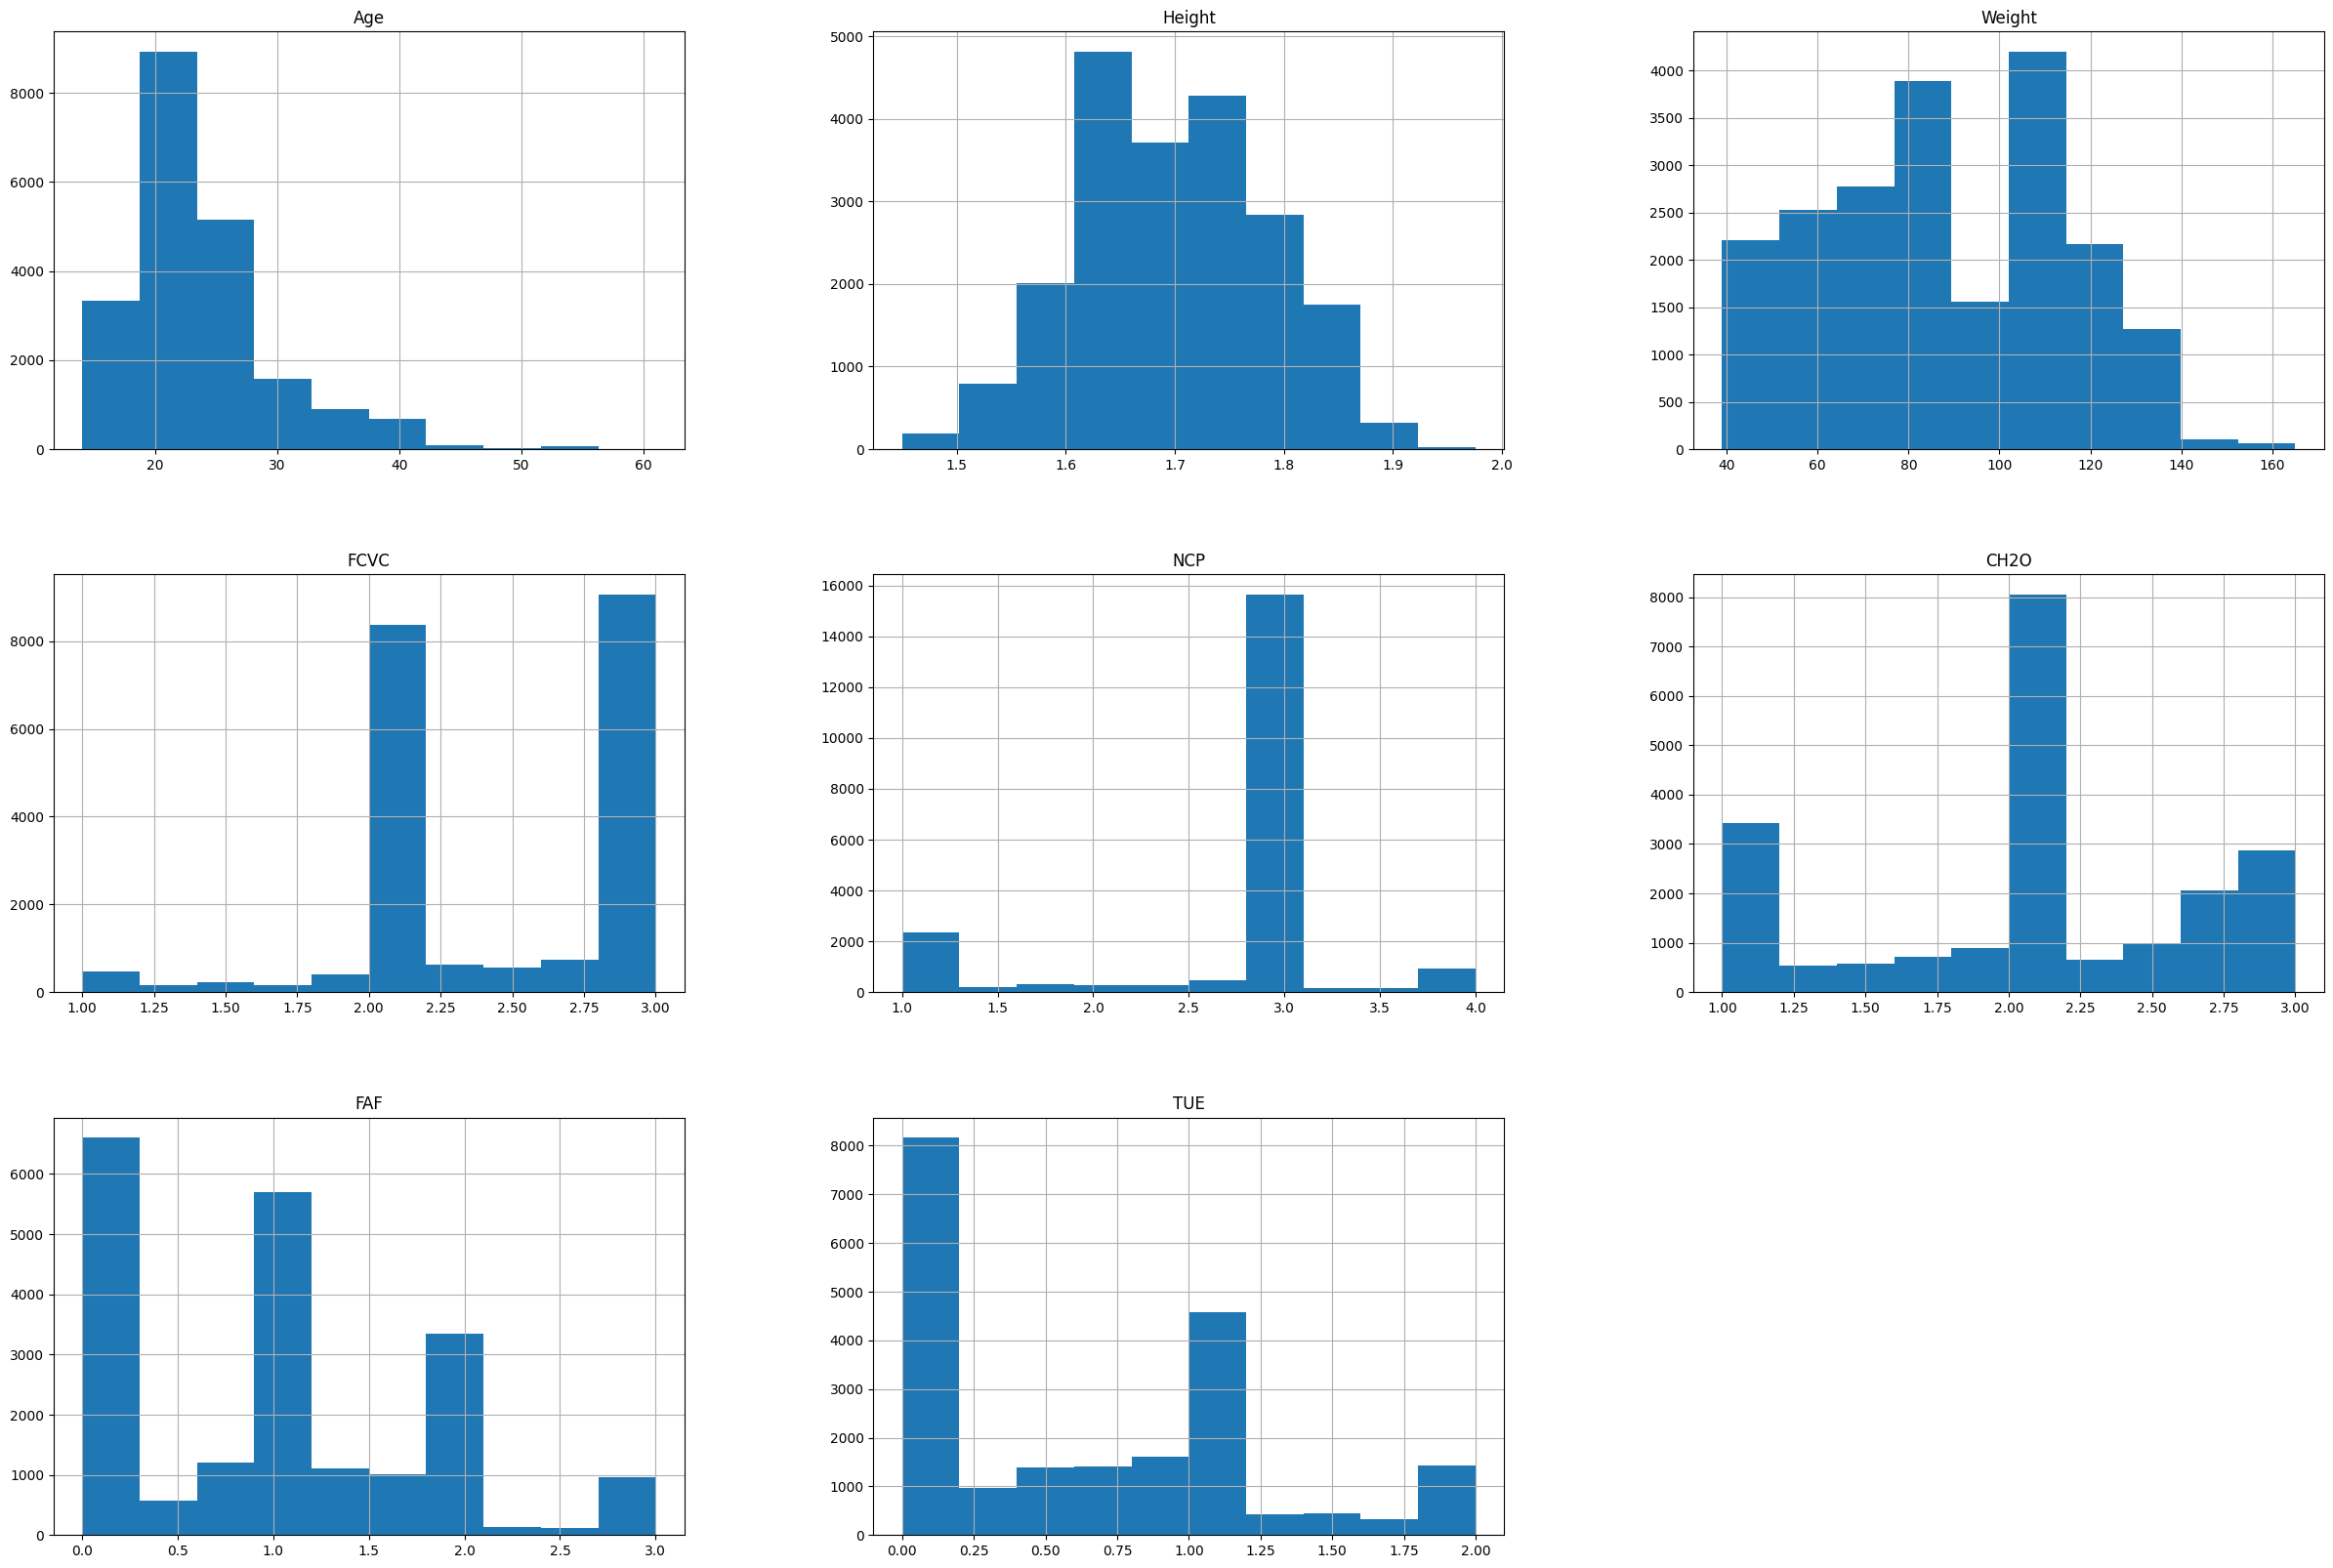

In [8]:
train_data[num_cols].drop('id', axis=1).hist(figsize=(30, 20))

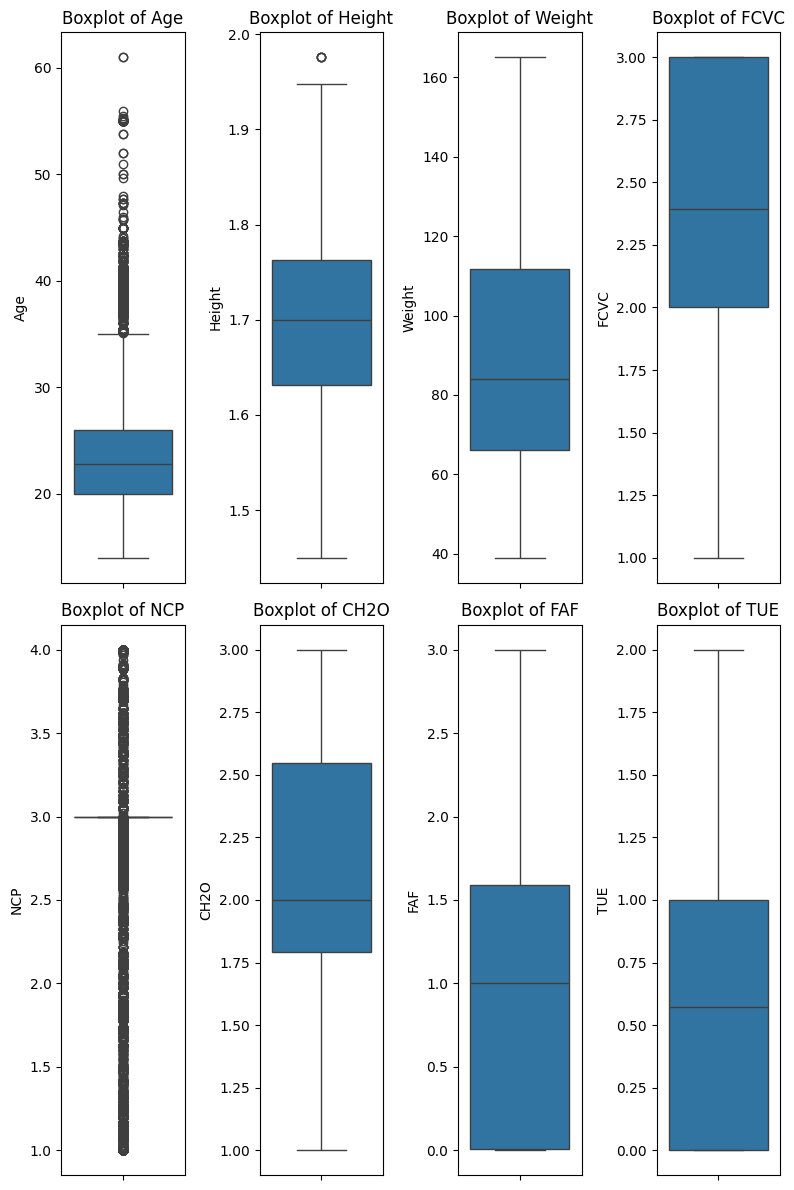

In [9]:
fig, axs = plt.subplots(2, 4, figsize=(8, 12))
axs= axs.flatten()
for i, col in enumerate(num_cols[1:]):
    sns.boxplot(data=train_data, y=col, ax=axs[i])
    axs[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

<ipython-input-10-a100cfd983a4>:30: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[col].dtype == np.number and data[col].nunique() > 2:  # Numerical and not discrete
<ipython-input-10-a100cfd983a4>:30: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[col].dtype == np.number and data[col].nunique() > 2:  # Numerical and not discrete
<ipython-input-10-a100cfd983a4>:30: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[col].dtype == np.number and data[col].nunique() > 2:  # Numerical and not discrete
<ipython-input-10-a100cfd983a4>:30: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is

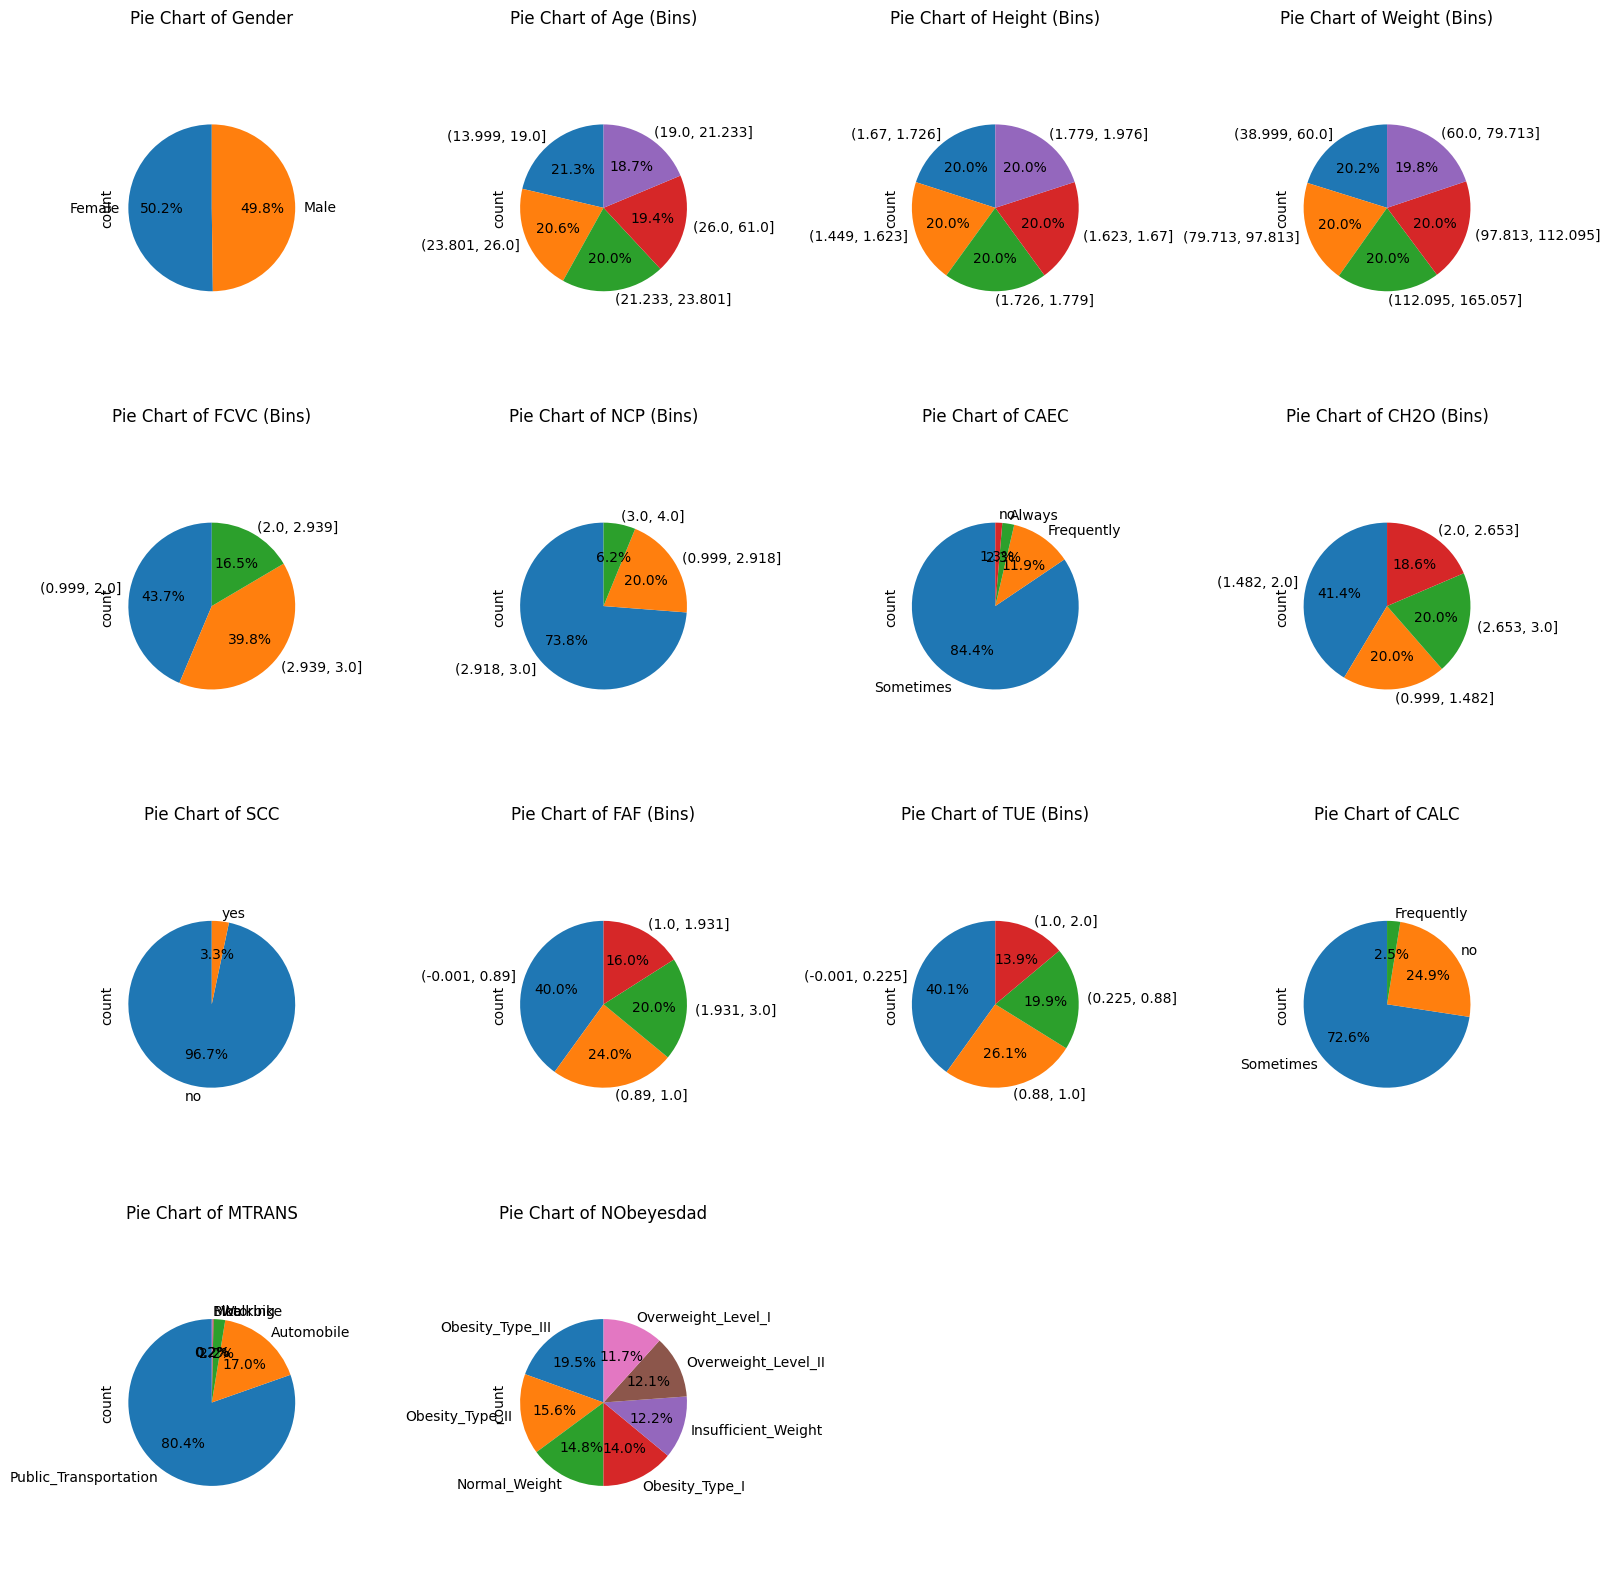

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ... (Your previous code for loading and preprocessing data) ...

def create_pie_charts(data, exclude_discrete_cols):
    """
    Creates pie charts for all columns except those with discrete (0, 1) values.

    Args:
        data: The pandas DataFrame containing the data.
        exclude_discrete_cols: A list of column names to exclude
                                 (those with discrete 0/1 values).
    """

    # Get all columns except those in exclude_discrete_cols
    all_cols = data.columns.tolist()
    cols_to_plot = [col for col in all_cols if col not in exclude_discrete_cols and col != 'id']

    num_subplots = len(cols_to_plot)
    num_rows = (num_subplots + 3) // 4  # Adjust rows as needed
    num_cols_per_row = 4  # Adjust columns per row as needed

    fig, axs = plt.subplots(num_rows, num_cols_per_row, figsize=(16, num_rows * 4))
    axs = axs.flatten()

    for i, col in enumerate(cols_to_plot):
        if data[col].dtype == np.number and data[col].nunique() > 2:  # Numerical and not discrete
            # Create bins for numerical data (adjust as needed)
            bins = pd.qcut(data[col], q=5, duplicates='drop')  # Example: 5 quantiles
            bins.value_counts().plot.pie(autopct='%1.1f%%', ax=axs[i], startangle=90)
            axs[i].set_title(f'Pie Chart of {col} (Bins)')
        else:  # Categorical or discrete with more than 2 values
            data[col].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[i], startangle=90)
            axs[i].set_title(f'Pie Chart of {col}')

        axs[i].axis('equal')

    # Hide any extra subplots if necessary
    for j in range(i + 1, len(axs)):
        axs[j].set_visible(False)

    plt.tight_layout()
    plt.show()


# Example usage:
exclude_discrete_cols = ['family_history_with_overweight', 'FAVC', 'SMOKE']
create_pie_charts(train_data, exclude_discrete_cols)

<ipython-input-11-71939d3443a2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, ax=axs[i], palette=sns.color_palette("pastel"))
<ipython-input-11-71939d3443a2>:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=train_data, x=col, ax=axs[i], palette=sns.color_palette("pastel"))
<ipython-input-11-71939d3443a2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, ax=axs[i], palette=sns.color_palette("pastel"))
<ipython-input-11-71939d3443a2>:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=train_data, x=col, 

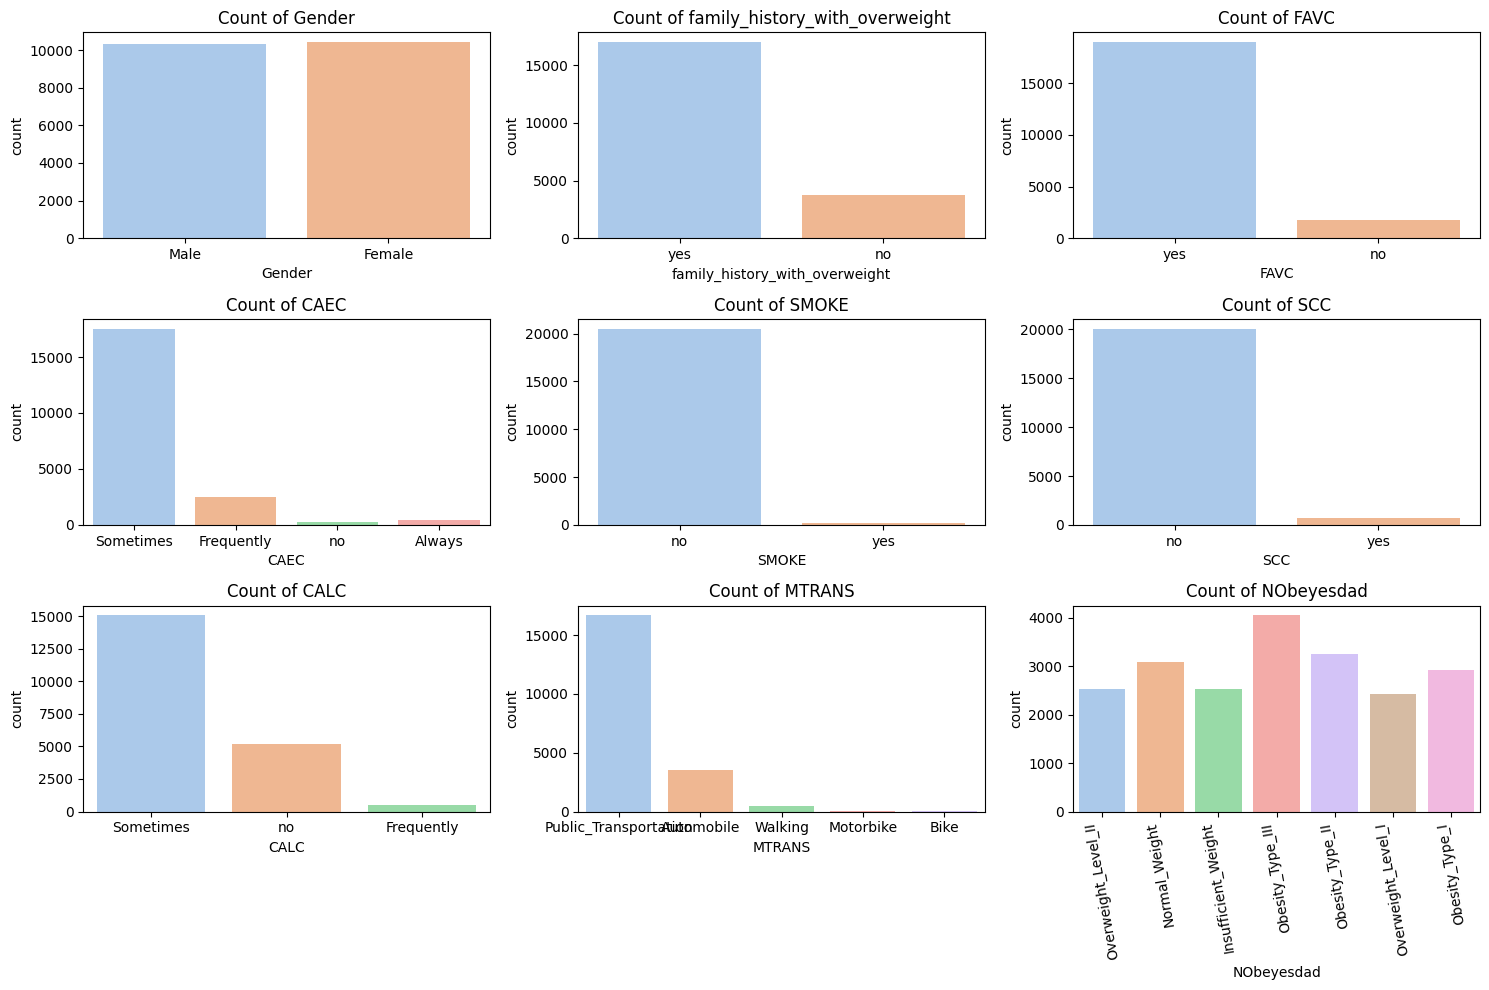

In [11]:
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
axs = axs.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=train_data, x=col, ax=axs[i], palette=sns.color_palette("pastel"))
    axs[i].set_title(f'Count of {col}')
    if i==8:
        axs[i].tick_params(axis='x', rotation=100)


for j in range(i + 1, len(axs)):
    axs[j].set_visible(False)

plt.tight_layout()
plt.show()

In [12]:
for column in train_data.columns:
    if train_data[column].dtype == 'object':
        print(f"Encoding column: {column}")
        encoder = LabelEncoder()
        if column in test_data.columns:
            # Combine train and test data for fitting the encoder
            combined_data = pd.concat([train_data[column], test_data[column]], ignore_index=True).astype(str)

            # Fit the encoder on unique values to handle unseen values in test data
            encoder.fit(combined_data.unique())

            # Transform train and test data
            train_data[column] = encoder.transform(train_data[column].astype(str))
            test_data[column] = encoder.transform(test_data[column].astype(str))
            print(f"{column} dtype after encoding: {train_data[column].dtype}")
            print(f"{column} unique values after encoding: {train_data[column].unique()}")
        else:
            print(f"Column '{column}' not found in test data. Skipping encoding for this column.")
            # Fit the encoder on unique values of the train data
            encoder.fit(train_data[column].astype(str).unique())
            train_data[column] = encoder.transform(train_data[column].astype(str))

Encoding column: Gender
Gender dtype after encoding: int64
Gender unique values after encoding: [1 0]
Encoding column: family_history_with_overweight
family_history_with_overweight dtype after encoding: int64
family_history_with_overweight unique values after encoding: [1 0]
Encoding column: FAVC
FAVC dtype after encoding: int64
FAVC unique values after encoding: [1 0]
Encoding column: CAEC
CAEC dtype after encoding: int64
CAEC unique values after encoding: [2 1 3 0]
Encoding column: SMOKE
SMOKE dtype after encoding: int64
SMOKE unique values after encoding: [0 1]
Encoding column: SCC
SCC dtype after encoding: int64
SCC unique values after encoding: [0 1]
Encoding column: CALC
CALC dtype after encoding: int64
CALC unique values after encoding: [2 3 1]
Encoding column: MTRANS
MTRANS dtype after encoding: int64
MTRANS unique values after encoding: [3 0 4 2 1]
Encoding column: NObeyesdad
Column 'NObeyesdad' not found in test data. Skipping encoding for this column.


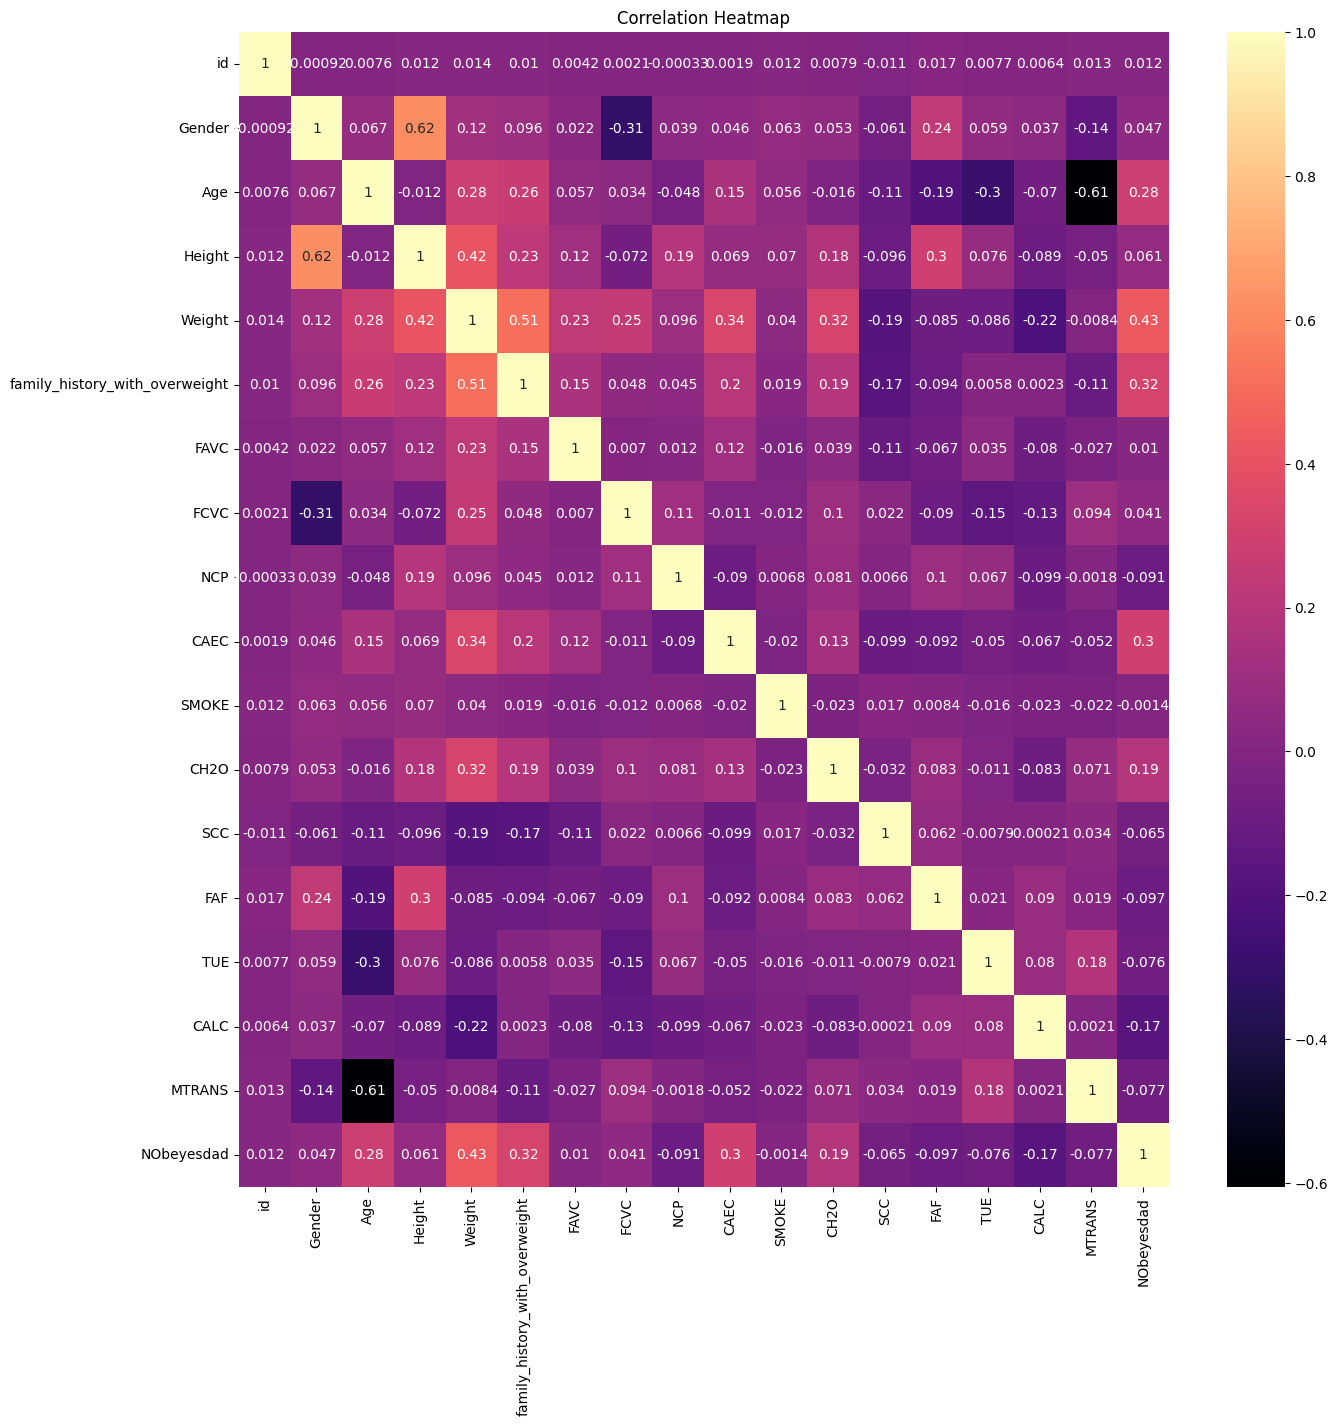

In [13]:
plt.figure(figsize=(15, 15))
sns.heatmap(train_data.corr(), annot=True, cmap='magma')
plt.title('Correlation Heatmap')
plt.show()

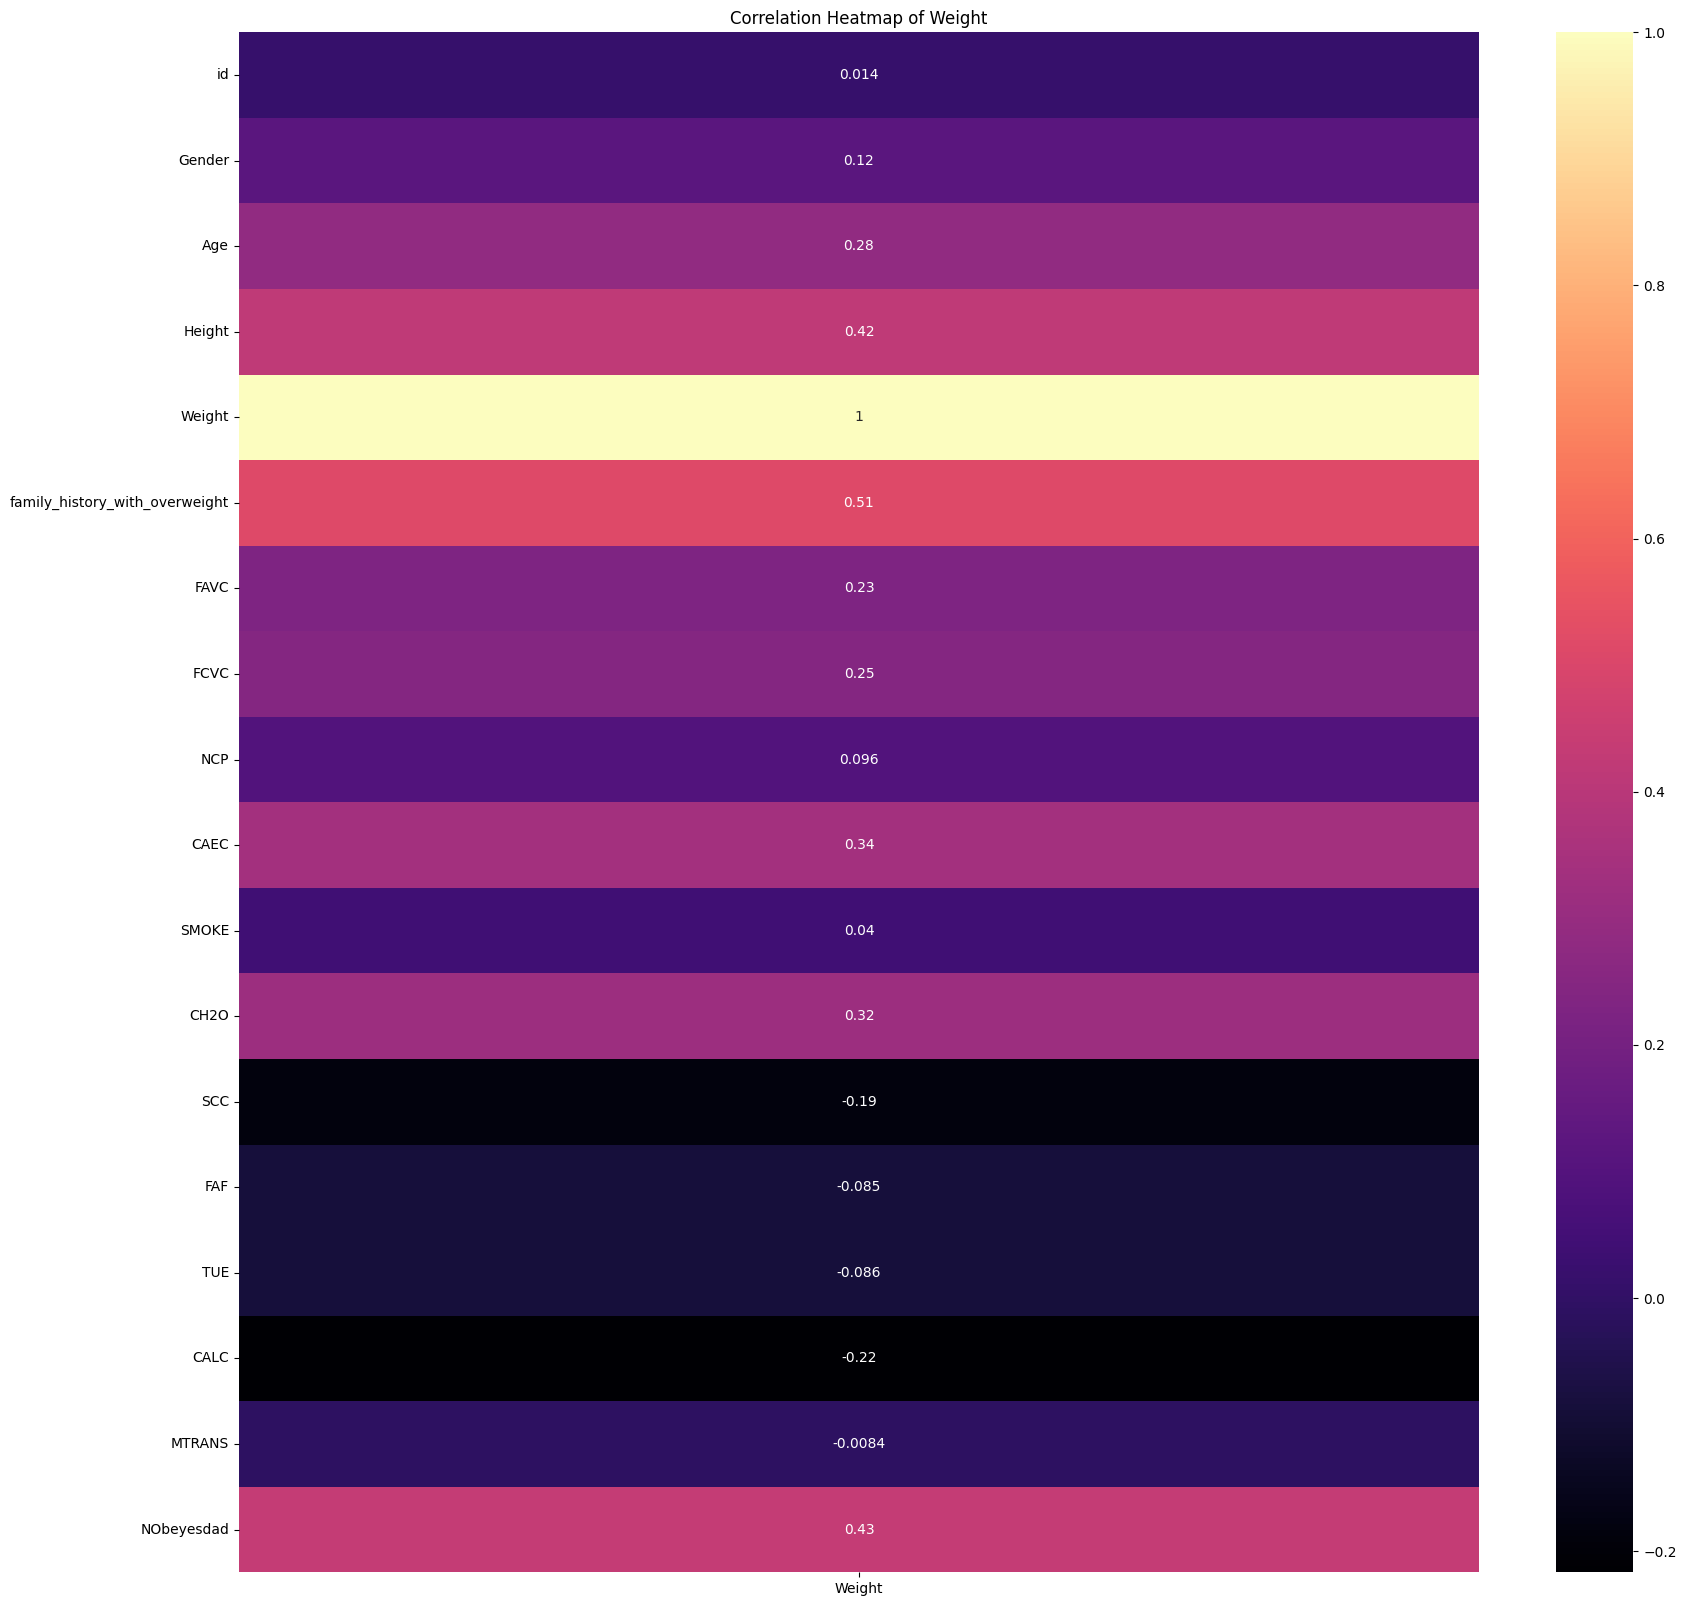

In [14]:
weight_correlations = train_data.corrwith(train_data['Weight'])
weight_corr_df = pd.DataFrame(weight_correlations, columns=['Weight'])
plt.figure(figsize=(20, 20))
sns.heatmap(weight_corr_df, annot=True, cmap='magma')
plt.title('Correlation Heatmap of Weight')
plt.show()

In [15]:
#HERE IS X,Y FOR FEATURE SELECTION NOT A MODEL
x = train_data.drop(['id','NObeyesdad'], axis=1)
y = train_data['NObeyesdad']
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state=20)

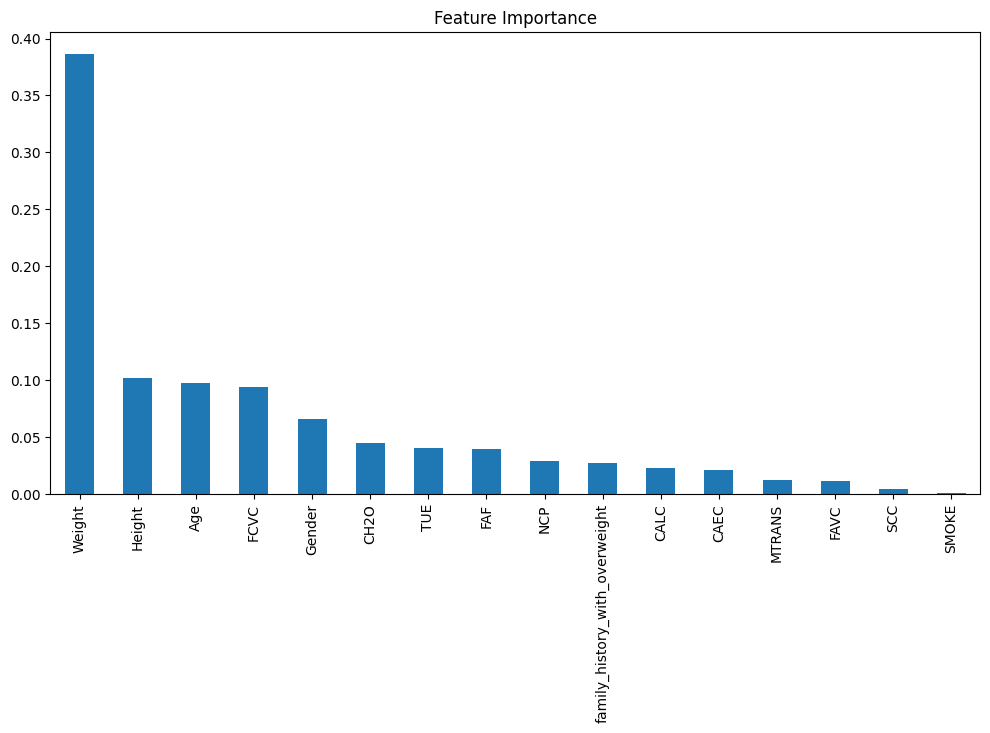

In [16]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

importance = pd.Series(model.feature_importances_, index=X_train.columns)
importance.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title("Feature Importance")
plt.show()


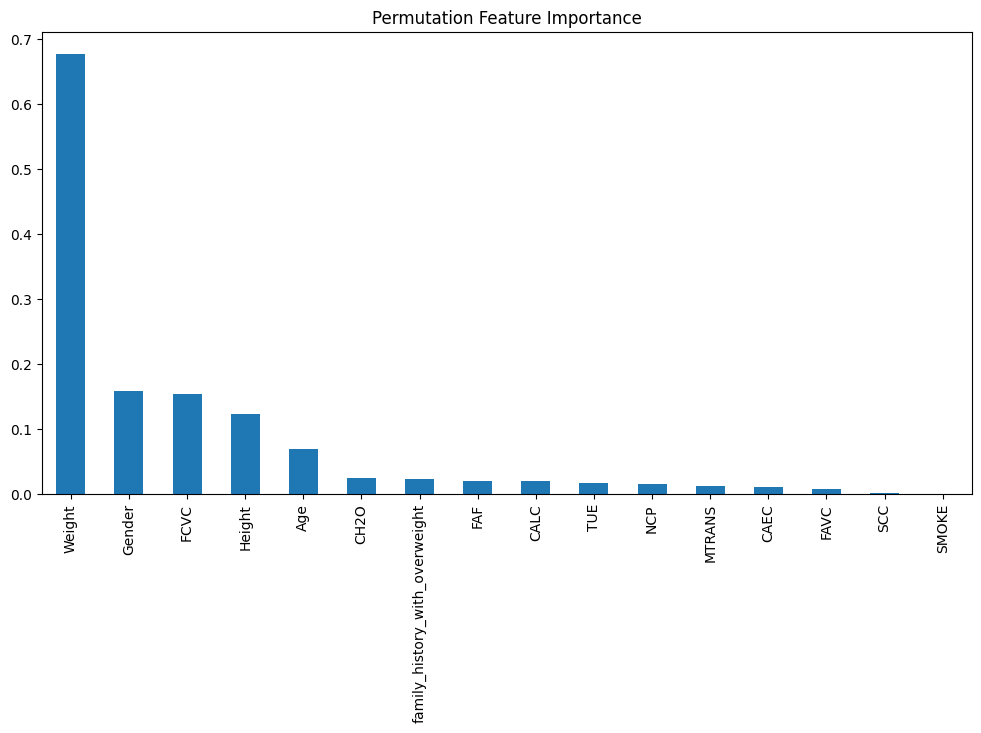

In [17]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=42)
perm_importance = pd.Series(result.importances_mean, index=X_train.columns)
perm_importance.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title("Permutation Feature Importance")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

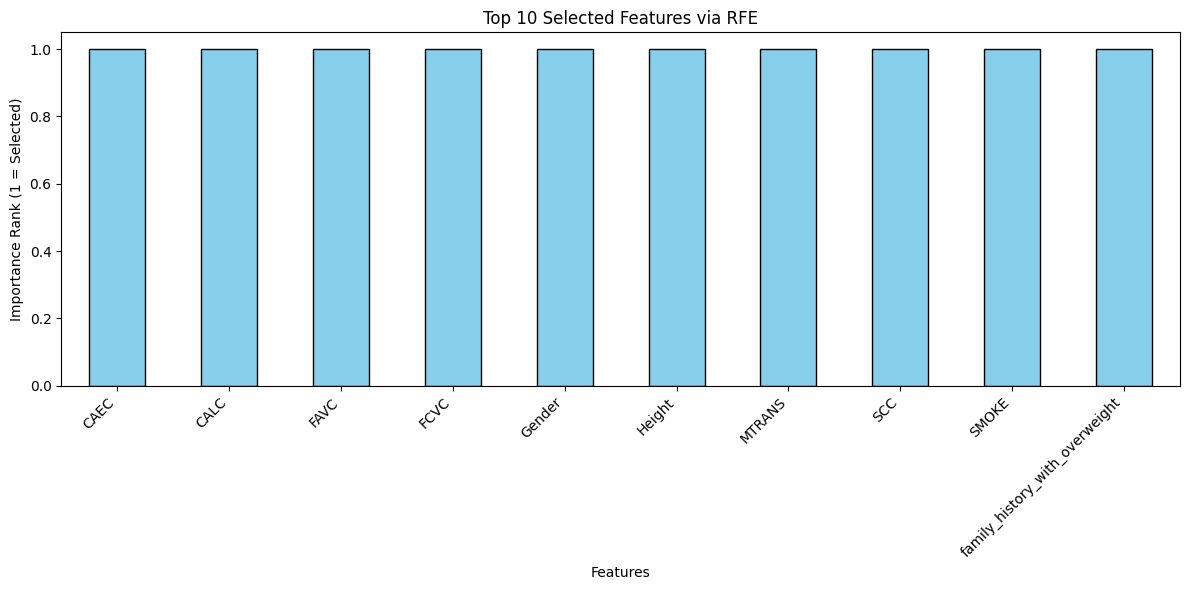

Selected Features in Rank Order:
 ['CAEC', 'CALC', 'FAVC', 'FCVC', 'Gender', 'Height', 'MTRANS', 'SCC', 'SMOKE', 'family_history_with_overweight']


In [18]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model and RFE
model = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X_train, y_train)

# Get the feature rankings and support mask
feature_ranking = pd.Series(rfe.ranking_, index=X_train.columns)
selected_features = feature_ranking[feature_ranking == 1]

# Sort selected features by name or importance
sorted_features = selected_features.sort_index()

# Plot the selected features
plt.figure(figsize=(12, 6))
sorted_features.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top 10 Selected Features via RFE")
plt.xlabel("Features")
plt.ylabel("Importance Rank (1 = Selected)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print the sorted feature names
print("Selected Features in Rank Order:\n", sorted_features.index.tolist())


In [20]:
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,2,0,2.763573,0,0.000000,0.976473,2,3,6
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,3,0,1
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,2,0,1.910378,0,0.866045,1.673584,3,3,0
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,2,0,1.674061,0,1.467863,0.780199,2,3,4
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,2,0,1.979848,0,1.967973,0.931721,2,3,6


In [21]:
x = train_data.drop(['id','NObeyesdad','CAEC', 'CALC', 'family_history_with_overweight', 'FAVC', 'MTRANS', 'SCC', 'SMOKE', 'NCP', 'TUE', 'FAF', 'CH2O'], axis=1)
y = train_data['NObeyesdad']
test_data_selected = test_data.drop(['id','CAEC', 'CALC', 'family_history_with_overweight', 'FAVC', 'MTRANS', 'SCC', 'SMOKE', 'NCP', 'TUE', 'FAF', 'CH2O'], axis=1)
X_train_val, X_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=20)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=20)

In [22]:
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_val_scaled = scalar.transform(X_val)
X_test_scaled = scalar.transform(X_test)
test_data_scaled = scalar.transform(test_data_selected)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_classifier.fit(X_train_scaled, y_train)

y_pred_knn_train = knn_classifier.predict(X_train_scaled)
y_pred_knn_test = knn_classifier.predict(X_test_scaled)
y_pred_knn_val = knn_classifier.predict(X_val_scaled)



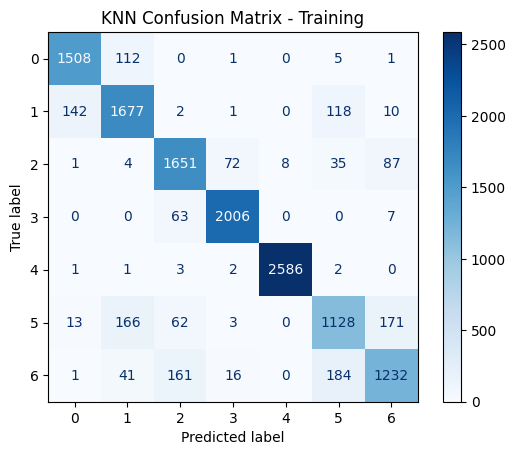

In [24]:
cm_train = confusion_matrix(y_train, y_pred_knn_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot(cmap='Blues')
plt.title("KNN Confusion Matrix - Training")
plt.show()

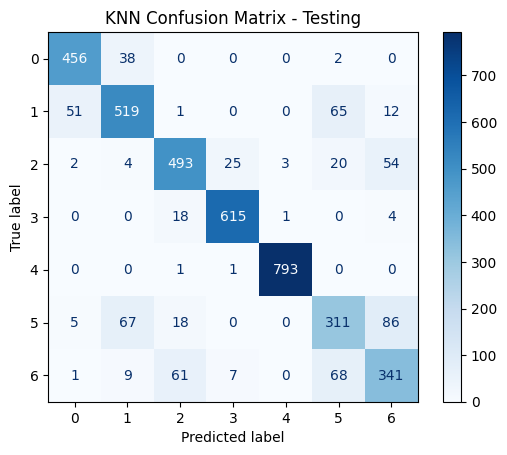

In [25]:
cm_train = confusion_matrix(y_test, y_pred_knn_test)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot(cmap='Blues')
plt.title("KNN Confusion Matrix - Testing")
plt.show()

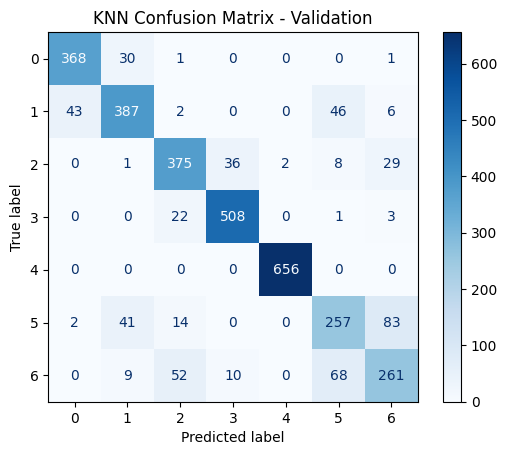

In [26]:
cm_val = confusion_matrix(y_val, y_pred_knn_val)
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp_val.plot(cmap='Blues')
plt.title("KNN Confusion Matrix - Validation")
plt.show()

In [27]:
print("KNN Classification Report - Training:")
print(classification_report(y_train, y_pred_knn_train))
print("_____________________________________________________")
print("KNN Classification Report - Testing:")
print(classification_report(y_test, y_pred_knn_test))
print("_____________________________________________________")
print("KNN Classification Report - Validation:")
print(classification_report(y_val, y_pred_knn_val))

KNN Classification Report - Training:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1627
           1       0.84      0.86      0.85      1950
           2       0.85      0.89      0.87      1858
           3       0.95      0.97      0.96      2076
           4       1.00      1.00      1.00      2595
           5       0.77      0.73      0.75      1543
           6       0.82      0.75      0.78      1635

    accuracy                           0.89     13284
   macro avg       0.88      0.87      0.87     13284
weighted avg       0.89      0.89      0.89     13284

_____________________________________________________
KNN Classification Report - Testing:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       496
           1       0.81      0.80      0.81       648
           2       0.83      0.82      0.83       601
           3       0.95      0.96      0.96       638
   

In [28]:
from sklearn.linear_model import LogisticRegression

logreg_classifier = LogisticRegression(max_iter=1000)
logreg_classifier.fit(X_train_scaled, y_train)

y_pred_logreg_train = logreg_classifier.predict(X_train_scaled)
y_pred_logreg_test = logreg_classifier.predict(X_test_scaled)
y_pred_logreg_val = logreg_classifier.predict(X_val_scaled)

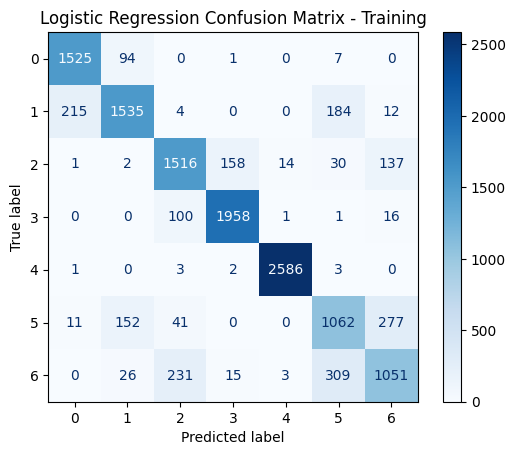

In [29]:
cm_train = confusion_matrix(y_train, y_pred_logreg_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot(cmap='Blues')
plt.title("Logistic Regression Confusion Matrix - Training")
plt.show()

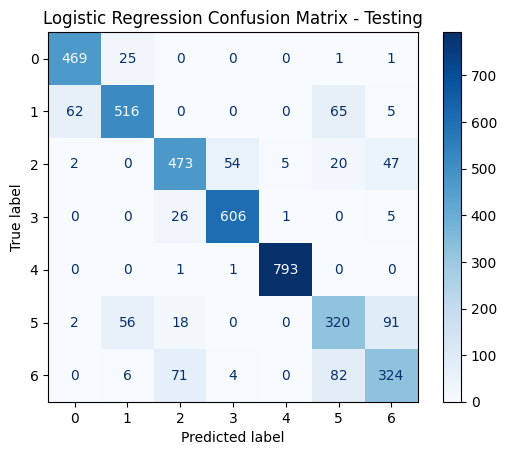

In [30]:
cm_train = confusion_matrix(y_test, y_pred_logreg_test)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot(cmap='Blues')
plt.title("Logistic Regression Confusion Matrix - Testing")
plt.show()

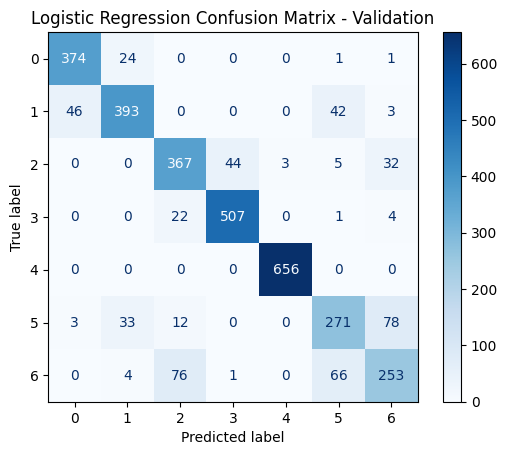

In [31]:
cm_train = confusion_matrix(y_val, y_pred_logreg_val)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot(cmap='Blues')
plt.title("Logistic Regression Confusion Matrix - Validation")
plt.show()

In [32]:
print("Logistic Regression Classification Report - Training:")
print(classification_report(y_train, y_pred_logreg_train))
print("_____________________________________________________")
print("Logistic Regression Classification Report - Testing:")
print(classification_report(y_test, y_pred_logreg_test))
print("_____________________________________________________")
print("Logistic Regression Classification Report - Validation:")
print(classification_report(y_val, y_pred_logreg_val))

Logistic Regression Classification Report - Training:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1627
           1       0.85      0.79      0.82      1950
           2       0.80      0.82      0.81      1858
           3       0.92      0.94      0.93      2076
           4       0.99      1.00      0.99      2595
           5       0.67      0.69      0.68      1543
           6       0.70      0.64      0.67      1635

    accuracy                           0.85     13284
   macro avg       0.83      0.83      0.83     13284
weighted avg       0.84      0.85      0.84     13284

_____________________________________________________
Logistic Regression Classification Report - Testing:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       496
           1       0.86      0.80      0.82       648
           2       0.80      0.79      0.79       601
           3       0.91  

In [33]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_scaled, y_train)

y_pred_svm_train = svm_classifier.predict(X_train_scaled)
y_pred_svm_test = svm_classifier.predict(X_test_scaled)
y_pred_svm_val = svm_classifier.predict(X_val_scaled)

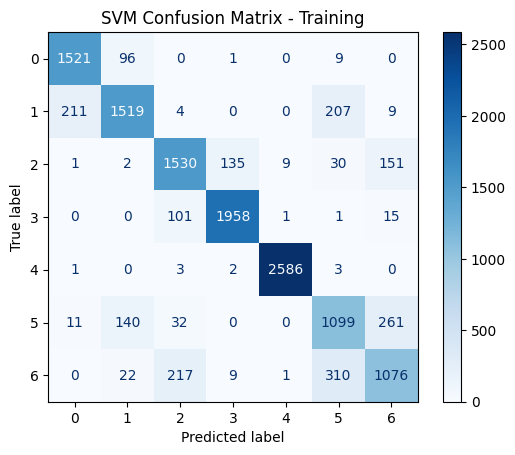

In [34]:
cm_train = confusion_matrix(y_train, y_pred_svm_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot(cmap='Blues')
plt.title("SVM Confusion Matrix - Training")
plt.show()

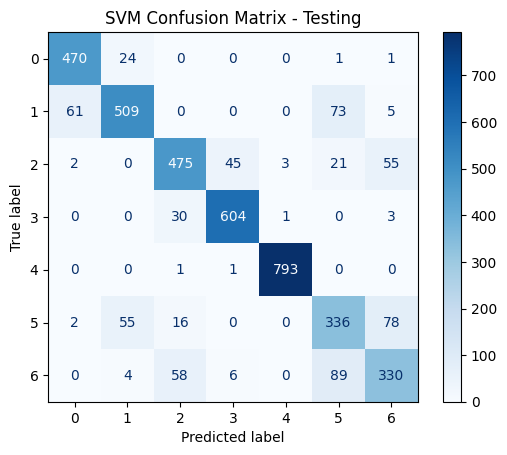

In [35]:
cm_train = confusion_matrix(y_test, y_pred_svm_test)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot(cmap='Blues')
plt.title("SVM Confusion Matrix - Testing")
plt.show()

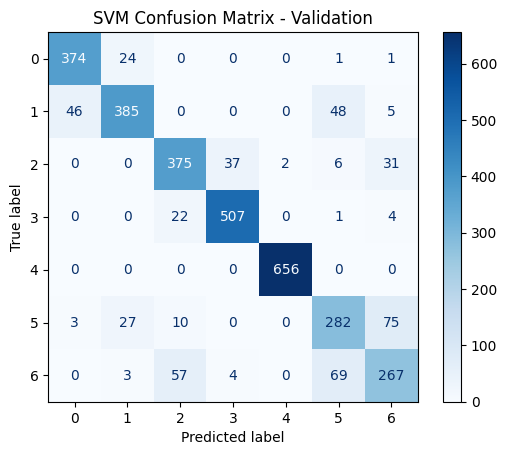

In [36]:
cm_train = confusion_matrix(y_val, y_pred_svm_val)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot(cmap='Blues')
plt.title("SVM Confusion Matrix - Validation")
plt.show()

In [37]:
print("SVM Classification Report - Training:")
print(classification_report(y_train, y_pred_svm_train))
print("_____________________________________________________")
print("SVM Classification Report - Testing:")
print(classification_report(y_test, y_pred_svm_test))
print("_____________________________________________________")
print("SVM Classification Report - Validation:")
print(classification_report(y_val, y_pred_svm_val))

SVM Classification Report - Training:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1627
           1       0.85      0.78      0.81      1950
           2       0.81      0.82      0.82      1858
           3       0.93      0.94      0.94      2076
           4       1.00      1.00      1.00      2595
           5       0.66      0.71      0.69      1543
           6       0.71      0.66      0.68      1635

    accuracy                           0.85     13284
   macro avg       0.83      0.84      0.83     13284
weighted avg       0.85      0.85      0.85     13284

_____________________________________________________
SVM Classification Report - Testing:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       496
           1       0.86      0.79      0.82       648
           2       0.82      0.79      0.80       601
           3       0.92      0.95      0.93       638
   

In [38]:
from imblearn.ensemble import BalancedRandomForestClassifier

balanced_rf_classifier = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
balanced_rf_classifier.fit(X_train_scaled, y_train)

y_pred_balanced_rf_train = balanced_rf_classifier.predict(X_train_scaled)
y_pred_balanced_rf_test = balanced_rf_classifier.predict(X_test_scaled)
y_pred_balanced_rf_val = balanced_rf_classifier.predict(X_val_scaled)

/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


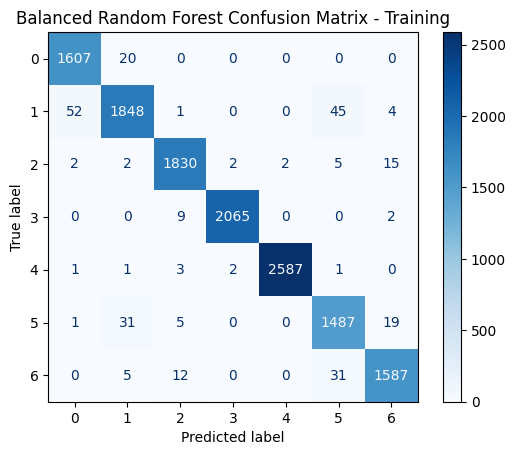

In [39]:
cm_train = confusion_matrix(y_train, y_pred_balanced_rf_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot(cmap='Blues')
plt.title("Balanced Random Forest Confusion Matrix - Training")
plt.show()

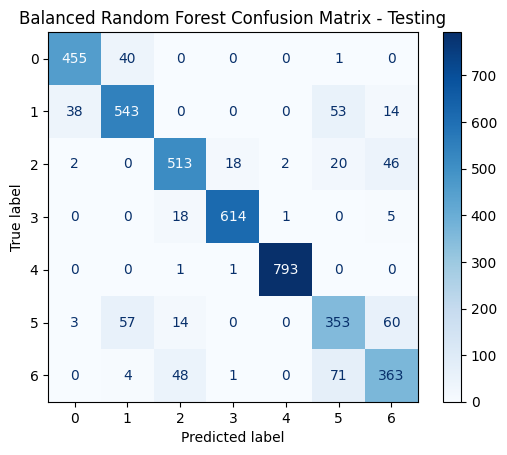

In [40]:
cm_test = confusion_matrix(y_test, y_pred_balanced_rf_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot(cmap='Blues')
plt.title("Balanced Random Forest Confusion Matrix - Testing")
plt.show()

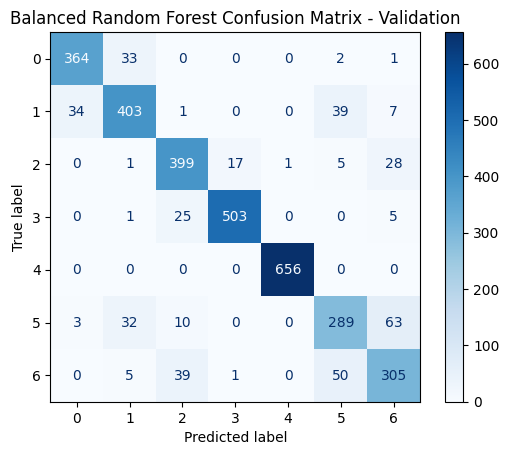

In [41]:
cm_val = confusion_matrix(y_val, y_pred_balanced_rf_val)
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp_val.plot(cmap='Blues')
plt.title("Balanced Random Forest Confusion Matrix - Validation")
plt.show()

In [42]:
print("Balanced Random Forest Classification Report - Training:")
print(classification_report(y_train, y_pred_balanced_rf_train))
print("_____________________________________________________")
print("Balanced Random Forest Classification Report - Testing:")
print(classification_report(y_test, y_pred_balanced_rf_test))
print("_____________________________________________________")
print("Balanced Random Forest Classification Report - Validation:")
print(classification_report(y_val, y_pred_balanced_rf_val))

Balanced Random Forest Classification Report - Training:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1627
           1       0.97      0.95      0.96      1950
           2       0.98      0.98      0.98      1858
           3       1.00      0.99      1.00      2076
           4       1.00      1.00      1.00      2595
           5       0.95      0.96      0.96      1543
           6       0.98      0.97      0.97      1635

    accuracy                           0.98     13284
   macro avg       0.98      0.98      0.98     13284
weighted avg       0.98      0.98      0.98     13284

_____________________________________________________
Balanced Random Forest Classification Report - Testing:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       496
           1       0.84      0.84      0.84       648
           2       0.86      0.85      0.86       601
           3       

In [49]:
lr=0.0001
r= 0.2
patience = 10
epoch = 500
batch = 64

In [55]:
model_tf = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(128,activation='elu',kernel_regularizer=keras.regularizers.l2(lr)),
    keras.layers.Dropout(r),
    keras.layers.Dense(128, activation= 'relu',kernel_regularizer=keras.regularizers.l2(lr)),
    keras.layers.Dropout(r),
    keras.layers.Dense(32, activation= 'elu',kernel_regularizer=keras.regularizers.l2(lr)),
    keras.layers.Dense(7, activation='softmax',kernel_regularizer=keras.regularizers.l2(lr))
])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
optimizer = keras.optimizers.Adam(learning_rate=lr)
model_tf.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])



In [57]:
history = model_tf.fit(X_train_scaled, y_train,
                    epochs=epoch, batch_size=batch,
                    validation_split=0.2,  # 20% of the data for validation
                    callbacks=[early_stopping])

Epoch 1/500
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3243 - loss: 1.7754 - val_accuracy: 0.5751 - val_loss: 1.2810
Epoch 2/500
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5760 - loss: 1.2158 - val_accuracy: 0.6308 - val_loss: 0.9926
Epoch 3/500
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6339 - loss: 0.9597 - val_accuracy: 0.6914 - val_loss: 0.8397
Epoch 4/500
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6810 - loss: 0.8424 - val_accuracy: 0.7475 - val_loss: 0.7342
Epoch 5/500
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7253 - loss: 0.7327 - val_accuracy: 0.7636 - val_loss: 0.6590
Epoch 6/500
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7479 - loss: 0.6682 - val_accuracy: 0.7919 - val_loss: 0.6080
Epoch 7/500
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7719 - loss: 0.6210 - val_accuracy: 0.8092 - val_loss: 0.5741
Epoch 8/500
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7873 - loss: 0.6007 - val_accu

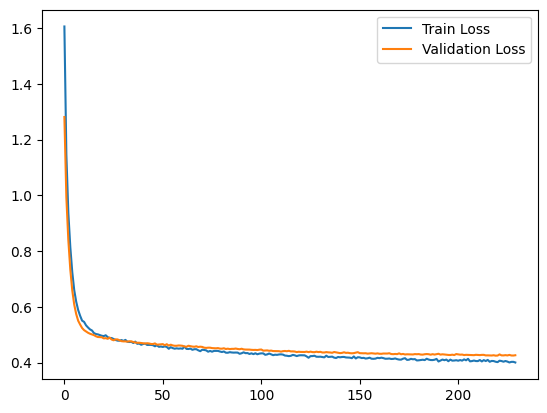

In [58]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [62]:
train_loss, train_accuracy = model_tf.evaluate(X_train_scaled, y_train)
print('Accuracy: ',(train_accuracy * 100))
print('Loss: ' , (train_loss))

416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8772 - loss: 0.3784
Accuracy:  87.19512224197388
Loss:  0.39089643955230713


In [53]:
!pip install scikeras

In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(model=model_tf, verbose=0)

# Define the hyperparameter grid
param_grid = {
    'model__hp_dense_units1': [128, 256, 512],
    'model__hp_dense_units2': [64, 128, 256],
    'model__hp_dropout': [0.2, 0.3, 0.4],
    'model__hp_lr': [0.0001, 0.001, 0.01],
    'model__hp_l2': [0.0001, 0.001, 0.01],
    'batch_size': [16, 32, 64, 128],
    'epochs': [25 ,50, 100, 250]
}

# Perform Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_result.best_params_)
print("Best Cross-Validation Accuracy:", grid_result.best_score_)

In [ ]:
best_params = grid_result.best_params_
final_model = model_tf(
    hp_dense_units1=best_params['hp_dense_units1'],
    hp_dense_units2=best_params['hp_dense_units2'],
    hp_dropout=best_params['hp_dropout'],
    hp_lr=best_params['hp_lr'],
    hp_l2=best_params['hp_l2']
)

final_model.fit(X_train_scaled, y_train,
                epochs=best_params['epochs'],
                batch_size=best_params['batch_size'],
                validation_split=0.2,
                callbacks=[early_stopping])

In [ ]:
predictions = model.predict(test_data_scaled)
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes, history = model2(train_data, test_data.values)
predicted_classes